In [2]:
# Pobieranie bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Załadowanie datasetu

df = pd.read_csv('/Users/iMac/Documents/Event datasets/Cosmetic Shop/2019-Dec.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [5]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    3474821
brand            1510289
price                  0
user_id                0
user_session         779
dtype: int64

In [6]:
print(df.duplicated().sum())

183860


In [10]:
df = df.drop_duplicates()

In [23]:
df_1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,view,1005105,2232732093077520756,construction.tools.light,apple,1302.48,556695836,ca5eefc5-11f9-450c-91ed-380285a0bc80
1,2019-12-01 00:00:00 UTC,view,22700068,2232732091643068746,NaN,force,102.96,577702456,de33debe-c7bf-44e8-8a12-3bf8421f842a
2,2019-12-01 00:00:01 UTC,view,2402273,2232732100769874463,appliances.personal.massager,bosch,313.52,539453785,5ee185a7-0689-4a33-923d-ba0130929a76
3,2019-12-01 00:00:02 UTC,purchase,26400248,2053013553056579841,computers.peripherals.printer,NaN,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db
4,2019-12-01 00:00:02 UTC,view,20100164,2232732110089618156,apparel.trousers,nika,101.68,517987650,906c6ca8-ff5c-419a-bde9-967ba8e2233e


In [ ]:
#Posegregowanie kolumn na te które posiadają wartości kategoryczne i numeryczne

object_columns  = df_1.select_dtypes(['object']).columns

int_columns  = df_1.select_dtypes(['int64']).columns

print(object_columns)
print(int_columns)

In [ ]:
df_1.describe()

In [ ]:
#Przegląd wartości i ich liczebności w zmiennych kategorycznych

for col in object_columns:
    print(df_1[col].value_counts())
    print("\n**************\n")

/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_27248/2362199287.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['hour'] = purchases['event_time'].dt.hour


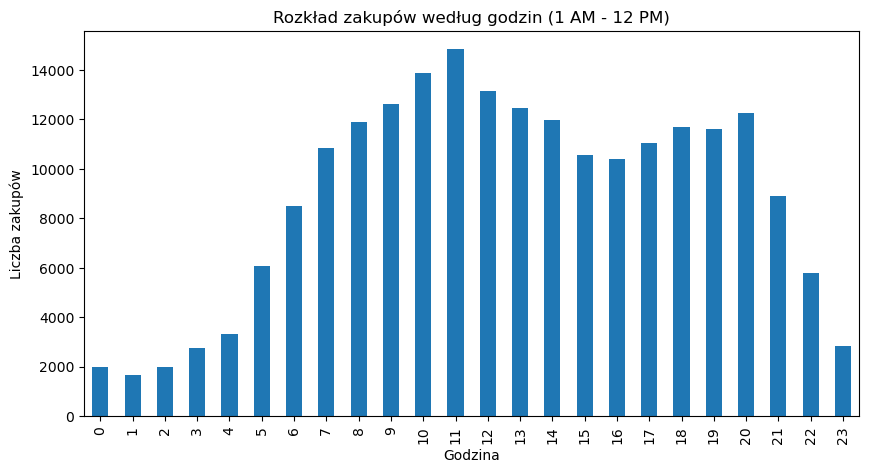

In [11]:
# Upewnij się, że kolumna 'event_time' jest typu datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Filtruj zdarzenia typu 'purchase'
purchases = df[df['event_type'] == 'purchase']

# Wyciągnij godzinę z czasu zdarzenia
purchases['hour'] = purchases['event_time'].dt.hour

# Grupuj zakupy według godzin
hourly_purchases = purchases['hour'].value_counts().sort_index()

# Wizualizacja
import matplotlib.pyplot as plt

hourly_purchases.plot(kind='bar', title='Rozkład zakupów według godzin (1 AM - 12 PM)', figsize=(10, 5))
plt.xlabel('Godzina')
plt.ylabel('Liczba zakupów')
plt.show()


In [ ]:
# Upewnij się, że kolumna 'event_time' jest typu datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Filtruj zdarzenia typu 'purchase'
purchases = df[df['event_type'] == 'purchase']

# Wyciągnij godzinę z czasu zdarzenia
purchases['hour'] = purchases['event_time'].dt.hour

# Grupuj zakupy według godzin i kategorii
hourly_category_purchases = purchases.groupby(['hour', 'category_code']).size().unstack(fill_value=0)

# Wizualizacja dla wybranych kategorii
import matplotlib.pyplot as plt

# Wybierz kilka kategorii (np. top 5 z największą liczbą zakupów)
top_categories = purchases['category_code'].value_counts().head(5).index

# Rysuj wykresy dla wybranych kategorii
for category in top_categories:
    hourly_category_purchases[category].plot(kind='bar', title=f'Zakupy według godzin dla kategorii: {category}', figsize=(10, 5))
    plt.xlabel('Godzina')
    plt.ylabel('Liczba zakupów')
    plt.show()


/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_27248/2702073296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['weekday'] = purchases['event_time'].dt.day_name()  # Nazwa dnia tygodnia


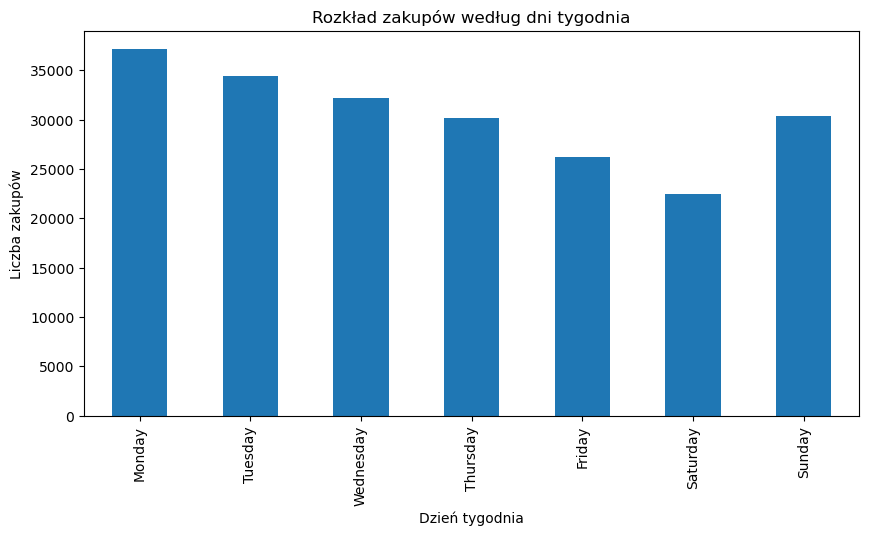

In [12]:
# Wyciągnij dzień tygodnia z czasu zdarzenia
purchases['weekday'] = purchases['event_time'].dt.day_name()  # Nazwa dnia tygodnia

# Predefiniowana kolejność dni tygodnia
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Grupuj zakupy według dni tygodnia
weekday_purchases = purchases['weekday'].value_counts()

# Sortowanie dni tygodnia według predefiniowanej kolejności
weekday_purchases = weekday_purchases.reindex(ordered_days)

# Wizualizacja
weekday_purchases.plot(kind='bar', title='Rozkład zakupów według dni tygodnia', figsize=(10, 5))
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba zakupów')
plt.show()



/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_27248/1209702817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['day_of_month'] = purchases['event_time'].dt.day


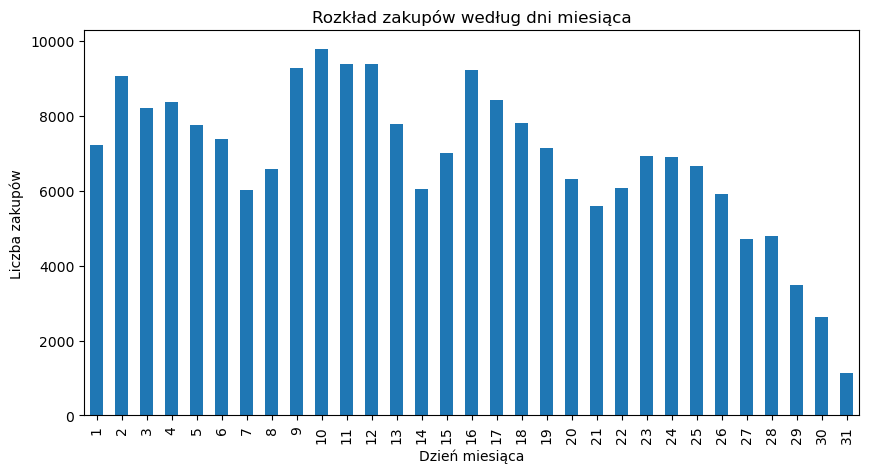

In [13]:
# Wyciągnij dzień miesiąca z czasu zdarzenia
purchases['day_of_month'] = purchases['event_time'].dt.day

# Grupuj zakupy według dni miesiąca
day_of_month_purchases = purchases['day_of_month'].value_counts().sort_index()

# Wizualizacja
day_of_month_purchases.plot(kind='bar', title='Rozkład zakupów według dni miesiąca', figsize=(10, 5))
plt.xlabel('Dzień miesiąca')
plt.ylabel('Liczba zakupów')
plt.show()

event_type
view               51.60
cart               27.22
remove_from_cart   14.82
purchase            6.36
Name: proportion, dtype: float64


<Axes: title={'center': 'Rozkład typów zdarzeń'}, xlabel='event_type'>

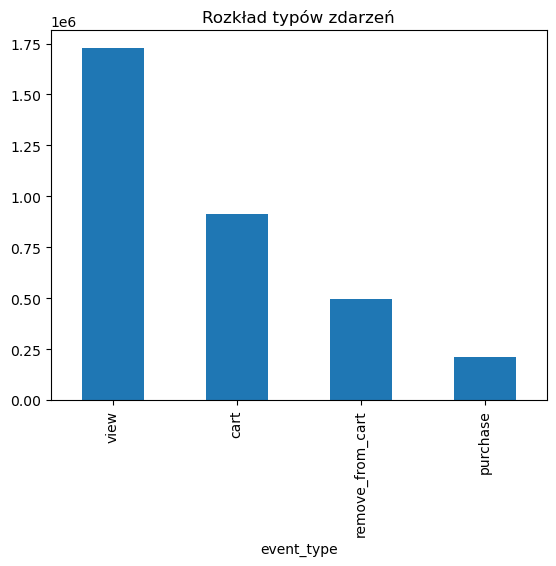

In [14]:
print(df['event_type'].value_counts(normalize=True) * 100)  # Procentowy udział zdarzeń
df['event_type'].value_counts().plot(kind='bar', title='Rozkład typów zdarzeń')  # Wykres


In [ ]:
# Filtracja i analiza dla każdego zdarzenia
event_types = df['event_type'].unique()  # Pobierz unikalne typy zdarzeń
for event in event_types:
    print(f"Najpopularniejsze produkty dla zdarzenia: {event}")
    popular_products = df[df['event_type'] == event]['product_id'].value_counts().head(10)
    print(popular_products)
    print()

In [ ]:
# Filtracja i analiza dla kategorii
for event in event_types:
    print(f"Najpopularniejsze kategorie dla zdarzenia: {event}")
    popular_categories = df[df['event_type'] == event]['category_code'].value_counts().head(10)
    print(popular_categories)
    print()

In [ ]:
# Filtracja i analiza dla marek
for event in event_types:
    print(f"Najpopularniejsze marki dla zdarzenia: {event}")
    popular_brands = df[df['event_type'] == event]['brand'].value_counts().head(10)
    print(popular_brands)
    print()

In [15]:
# Filtracja zdarzeń typu 'purchase'
purchase_events = df[df['event_type'] == 'purchase']

In [32]:
# Obliczanie kwartyli
q1, q2, q3 = purchase_events['price'].quantile([0.25, 0.5, 0.75])
print(f"Q1: {q1}, Q2 (mediana): {q2}, Q3: {q3}")

# Definiowanie przedziałów cenowych
bins = [0, q1, q2, q3, purchase_events['price'].max()]
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]

# Tworzenie kolumny z przedziałami cenowymi
purchase_events['price_range'] = pd.cut(purchase_events['price'], bins=bins, labels=labels, include_lowest=True)

# Grupowanie według kategorii i przedziałów cenowych
price_range_analysis = purchase_events.groupby(['category_code', 'price_range']).size().unstack(fill_value=0)


Q1: 84.02, Q2 (mediana): 176.84, Q3: 344.38


/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_15907/3907636253.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_events['price_range'] = pd.cut(purchase_events['price'], bins=bins, labels=labels, include_lowest=True)
/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_15907/3907636253.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_analysis = purchase_events.groupby(['category_code', 'price_range']).size().unstack(fill_value=0)


In [ ]:
# Grupowanie według kategorii i przedziałów cenowych
price_range_analysis = purchase_events.groupby(['category_code', 'price_range']).size().unstack(fill_value=0)

# Procentowy udział zakupów w przedziałach cenowych
price_range_percentage = price_range_analysis.div(price_range_analysis.sum(axis=1), axis=0) * 100

# Wybieramy top 5 kategorii z największą liczbą zakupów
top_categories = price_range_analysis.sum(axis=1).nlargest(5).index

for category in top_categories:
    price_range_analysis.loc[category].plot(kind='bar', title=f'Rozkład Zakupów wg Cen w Kategorii: {category}')
    plt.ylabel('Liczba Zakupów')
    plt.xlabel('Przedział Cenowy')
    plt.xticks(rotation=45)
    plt.show()

In [16]:
session_time = df.groupby('user_session')['event_time'].agg(['min', 'max'])
session_time['duration'] = (session_time['max'] - session_time['min']).dt.total_seconds() / 60
print(session_time['duration'].describe())

count   839812.00
mean        59.28
std        930.36
min          0.00
25%          0.00
50%          0.00
75%          1.35
max      43696.47
Name: duration, dtype: float64


In [17]:
# Filtracja zdarzeń typu 'view'
view_events = df[df['event_type'] == 'view']

# Obliczenie średniej liczby `view` produktów na sesję
avg_views_per_session = view_events.groupby('user_session')['product_id'].count().mean()
print(f"Średnia liczba `view` produktów w sesji: {avg_views_per_session}")

Średnia liczba `view` produktów w sesji: 2.1754546736218807


In [18]:
# Filtracja zdarzeń typu 'cart'
cart_events = df[df['event_type'] == 'cart']

# Obliczenie średniej liczby `cart` produktów na sesję
avg_carts_per_session = cart_events.groupby('user_session')['product_id'].count().mean()
print(f"Średnia liczba `cart` produktów w sesji: {avg_carts_per_session}")

Średnia liczba `cart` produktów w sesji: 5.5116488702017605


In [19]:
# Obliczenie średniej liczby `view` produktów na użytkownika
avg_views_per_user = view_events.groupby('user_id')['product_id'].count().mean()
print(f"Średnia liczba `view` produktów na użytkownika: {avg_views_per_user}")


Średnia liczba `view` produktów na użytkownika: 4.824575949437763


In [20]:
# Obliczenie średniej liczby `cart` produktów na użytkownika
avg_carts_per_user = cart_events.groupby('user_id')['product_id'].count().mean()
print(f"Średnia liczba `cart` produktów na użytkownika: {avg_carts_per_user}")


Średnia liczba `cart` produktów na użytkownika: 10.923350667401568


In [21]:
# Filtracja zdarzeń typu 'purchase'
purchase_events = df[df['event_type'] == 'purchase']

# Liczenie liczby zakupów w każdej sesji
purchases_per_session = purchase_events.groupby('user_session')['product_id'].count()

# Obliczenie średniej tylko dla sesji zakończonych `purchase`
avg_purchases_per_purchase_session = purchases_per_session.mean()
print(f"Średnia liczba kupionych produktów w sesjach zakończonych `purchase`: {avg_purchases_per_purchase_session}")

Średnia liczba kupionych produktów w sesjach zakończonych `purchase`: 7.374056897625804


In [22]:
# Liczenie liczby zakupów na użytkownika
purchases_per_user = purchase_events.groupby('user_id')['product_id'].count()

# Obliczenie średniej liczby zakupów na użytkownika
avg_purchases_per_user = purchases_per_user.mean()
print(f"Średnia liczba kupionych produktów na użytkownika: {avg_purchases_per_user}")


Średnia liczba kupionych produktów na użytkownika: 8.31866630226838


In [23]:
# Policzenie unikalnych sesji dla każdego użytkownika
sessions_per_user = df.groupby('user_id')['user_session'].nunique()

# Obliczenie średniej liczby sesji na użytkownika
avg_sessions_per_user = sessions_per_user.mean()

print(f"Średnia liczba sesji na użytkownika: {avg_sessions_per_user}")

Średnia liczba sesji na użytkownika: 2.268961027031992
